<a href="https://colab.research.google.com/github/Rutucody/Chatbot/blob/main/DL_Prac_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem Statement – Real estate agents want help to predict the house price for regions in the USA.
##He gave you the dataset to work on and you decided to use the Linear Regression Model. Create a
##model that will help him to estimate what the house would sell for.
URL for a dataset:
https://github.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/blob/master/USA_Housing.csv

In [ ]:
# upload your csv file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then you can use the uploaded file in your code:
# e.g.
# df = pd.read_csv(fn)


Saving USA_Housing.csv to USA_Housing.csv
User uploaded file "USA_Housing.csv" with length 726209 bytes


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
X = df.drop('Price', axis=1)

In [ ]:
X = df.drop('Address', axis=1)

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([1339096.07724513, 1251794.17883686, 1340094.96620542, ...,
       1472887.24706053, 1409762.1194903 , 1009606.28363319])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 1.5954719856381417e-10
MSE: 4.604527570137527e-20
RMSE: 2.1458162945922297e-10
R-squared: 1.0


##2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a.
Perform Data Pre-processing

b. Define Model and perform training

c. Evaluate Results using confusion
matrix.

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# a. Data Preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# b. Model Definition and Training
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)

# c. Evaluation with Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 8ms/step


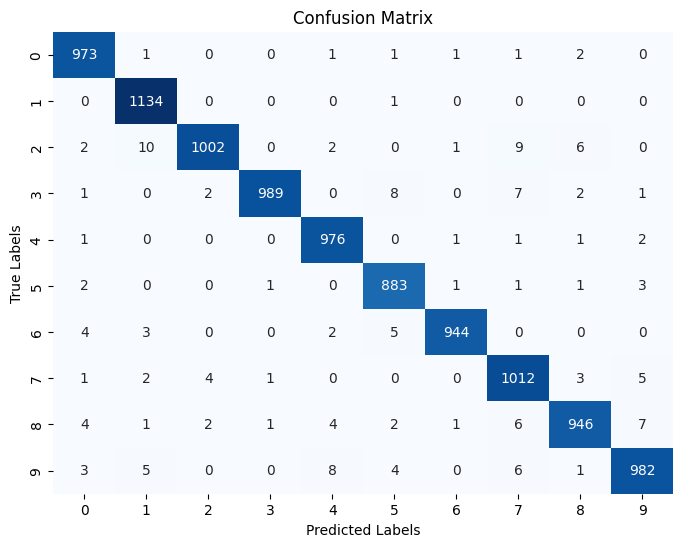

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##3. Design RNN or its variant including LSTM or GRU
a) Select a suitable time series dataset.
Example – predict sentiments based on product reviews

b) Apply for prediction

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb

# a. Data Preparation
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
max_len = 256
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# b. Model Building and Prediction
model = Sequential([
    Embedding(10000, 32, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

# Example Prediction
new_review = "This movie was bad!"
word_index = imdb.get_word_index()
new_review_indices = [word_index.get(word, 0) for word in new_review.split()]  # 0 for unknown words
new_review_encoded = tf.keras.preprocessing.sequence.pad_sequences([new_review_indices], maxlen=max_len)
prediction = model.predict(new_review_encoded)
print(f"Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")

1/1 [==============================] - 1s 644ms/step
Sentiment: Negative


##4. Design and implement a CNN for Image Classification

a) Select a suitable image classification
dataset (medical imaging, agricultural, etc.).

b) Optimized with different hyper-parameters including
learning rate, filter size, no. of layers, optimizers, dropouts, etc.

In [ ]:
pip install -q optuna

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Shrinking Data
train_images=train_images[:300]
train_labels=train_labels[:300]
test_images=test_images[:100]
test_labels=test_labels[:100]

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

def create_model(trial):
    # Define hyperparameters to be optimized
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)
    num_filters = trial.suggest_int('num_filters', 32, 128)

    model = models.Sequential([
        layers.Conv2D(num_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 2, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10)
    ])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def objective(trial):
    # Create model and train
    model = create_model(trial)
    model.fit(train_images, train_labels, epochs=1, batch_size=32, verbose=0)

    # Evaluate model
    _, accuracy = model.evaluate(test_images, test_labels)
    return accuracy

# Set up Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Print results
best_trial = study.best_trial
print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-04-27 14:50:40,912] A new study created in memory with name: no-name-a38a62a3-5970-4196-ac83-456e0a1ecc25
<ipython-input-38-d51ed1421552>:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)


4/4 [==============================] - 0s 63ms/step - loss: 2.2962 - accuracy: 0.1300


[I 2024-04-27 14:50:45,206] Trial 0 finished with value: 0.12999999523162842 and parameters: {'optimizer': 'sgd', 'dropout_rate': 0.4578844908424317, 'num_filters': 99}. Best is trial 0 with value: 0.12999999523162842.


4/4 [==============================] - 1s 55ms/step - loss: 2.3062 - accuracy: 0.0600


[I 2024-04-27 14:50:49,783] Trial 1 finished with value: 0.05999999865889549 and parameters: {'optimizer': 'rmsprop', 'dropout_rate': 0.2766696199857324, 'num_filters': 81}. Best is trial 0 with value: 0.12999999523162842.


4/4 [==============================] - 0s 36ms/step - loss: 2.3483 - accuracy: 0.1100


[I 2024-04-27 14:50:54,666] Trial 2 finished with value: 0.10999999940395355 and parameters: {'optimizer': 'rmsprop', 'dropout_rate': 0.31705689480313987, 'num_filters': 52}. Best is trial 0 with value: 0.12999999523162842.


4/4 [==============================] - 1s 48ms/step - loss: 2.3219 - accuracy: 0.0900


[I 2024-04-27 14:50:59,336] Trial 3 finished with value: 0.09000000357627869 and parameters: {'optimizer': 'adam', 'dropout_rate': 0.451048794788845, 'num_filters': 43}. Best is trial 0 with value: 0.12999999523162842.


4/4 [==============================] - 1s 65ms/step - loss: 2.3010 - accuracy: 0.1100


[I 2024-04-27 14:51:06,326] Trial 4 finished with value: 0.10999999940395355 and parameters: {'optimizer': 'rmsprop', 'dropout_rate': 0.21307423678028198, 'num_filters': 85}. Best is trial 0 with value: 0.12999999523162842.


Best trial:
  Value:  0.12999999523162842
  Params: 
    optimizer: sgd
    dropout_rate: 0.4578844908424317
    num_filters: 99


##5. Perform Sentiment Analysis in the network graph using RNN

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load IMDb dataset
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

# Define model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

782/782 [==============================] - 295s 369ms/step - loss: 0.4455 - accuracy: 0.7907 - val_loss: 0.3832 - val_accuracy: 0.8347


In [ ]:
# Evaluate above model on a given sentence
new_review = "This movie was bad!"
word_index = imdb.get_word_index()
new_review_indices = [word_index.get(word, 0) for word in new_review.split()]  # 0 for unknown words
new_review_encoded = tf.keras.preprocessing.sequence.pad_sequences([new_review_indices], maxlen=maxlen)
prediction = model.predict(new_review_encoded)
print(f"Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")

1/1 [==============================] - 0s 290ms/step
Sentiment: Negative
